In [ ]:
!wget https://raw.githubusercontent.com/dphi-official/Datasets/master/electronic_product/electronic_product/Testing_set_label.csv
!wget https://raw.githubusercontent.com/dphi-official/Datasets/master/electronic_product/electronic_product/Training_set_label.csv

--2020-12-05 18:13:58--  https://raw.githubusercontent.com/dphi-official/Datasets/master/electronic_product/electronic_product/Testing_set_label.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19126729 (18M) [text/plain]
Saving to: ‘Testing_set_label.csv.1’

Testing_set_label.c 100%[===================>]  18.24M  39.7MB/s    in 0.5s    

2020-12-05 18:13:59 (39.7 MB/s) - ‘Testing_set_label.csv.1’ saved [19126729/19126729]

--2020-12-05 18:13:59--  https://raw.githubusercontent.com/dphi-official/Datasets/master/electronic_product/electronic_product/Training_set_label.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv('Training_set_label.csv')
test = pd.read_csv('Testing_set_label.csv')
x=['prices.sourceURLs','imageURLs','keys','sourceURLs']
for i in x:
  del df[i]

In [ ]:
train.head(5)

id prices.availability  ...           weight   price
0  AVphrugr1cnluZ0-FOeH                 Yes  ...         3 pounds   92.99
1  AVrI6FDbv8e3D1O-lm4R                 Yes  ...       4.3 pounds  229.99
2  AVpiLlubilAPnD_xBoTa                 Yes  ...       0.6 ounces   16.99
3  AVpgQP5vLJeJML43LQbd                 Yes  ...         1 pounds   69.99
4  AV1YDsmoGV-KLJ3adcbe     More on the Way  ...  9.98 oz 4.09 oz  846.00

[5 rows x 25 columns]

In [ ]:
test.head(5)

id  ...                                             weight
0  AVpfM8Rp1cnluZ0-gFTv  ...                                            22.5 lb
1  AVpfDLA0ilAPnD_xT0sq  ...                                         8.9 pounds
2  AV8whL5eHh53nbDR-yBh  ...  2.31 lbs                                      ...
3  AVpgLYjnilAPnD_xonGt  ...                                        39.7 pounds
4  AV13iKow-jtxr-f38NNS  ...                                       16.48 pounds

[5 rows x 24 columns]

In [ ]:
df=pd.concat([train,test])

In [ ]:
from google.colab import files
files.upload()

Saving dp16 (1).csv to dp16 (1).csv


{'dp16 (1).csv': b'id,prices.availability,prices.condition,prices.currency,prices.da eSeen,prices.isSale,prices.merchant,prices.shipping,asins,brand,categories,da eAdded,da eUpda ed,ean,manufacturer,manufacturerNumber,name,primaryCategories,upc,weight,unit,price\r\nAVphrugr1cnluZ0-FOeH,Yes,New,USD,5/10/2017 20:00,0,Bestbuy.com,,B00I9HD8PK,Grace Digital,"Electronics,Home Audio & Theater,Home Audio,All Home Speakers,Speaker Systems,Portable Audio & Video,Portable Speakers & Docks,Portable Bluetooth Speakers,Audio,Bluetooth & Wireless Speakers,Stereos,Electrical,Home Electronics,Portable Audio",11/1/2015 0:57,2/13/2018 19:46,,Ecoxgear,GDI-EGST701,EcoXGear Ecostone Bluetooth Speaker,Electronics,8.19E+11,3,pounds,92.99\r\nAVrI6FDbv8e3D1O-lm4R,Yes,New,USD,10/10/2017 2:00,0,Bestbuy.com,,B06ZY63J8H,Lenovo,"Electronics,Computers,Laptops,Laptops By Brand,Lenovo,Computers & Tablets,Computers/Tablets & Networking,Laptops & Netbooks,PC Laptops & Netbooks,Computers & Accessories,Traditional Laptops"

In [ ]:
df=pd.read_csv('dp16 (1).csv')

In [ ]:
df.nunique(), df.isnull().sum(),df.dtypes

(id                           832
 prices.availability           14
 prices.condition              11
 prices.currency                2
 prices.isSale                  2
                             ... 
 mobiles                        2
 musical                        2
 pet                            2
 portableaudio&accessories      2
 sports                         2
 Length: 3063, dtype: int64, id                           0
 prices.availability          0
 prices.condition             0
 prices.currency              0
 prices.isSale                0
                             ..
 mobiles                      0
 musical                      0
 pet                          0
 portableaudio&accessories    0
 sports                       0
 Length: 3063, dtype: int64, id                           int64
 prices.availability          int64
 prices.condition             int64
 prices.currency              int64
 prices.isSale                int64
                              ...  
 m

In [ ]:
#df['ean']=df['ean'].fillna(method='bfill')
#df['ean']=df['ean'].fillna(method='ffill')
df['manufacturer']=df['manufacturer'].fillna('unknown')
df['prices.shipping']=df['prices.shipping'].fillna(method='bfill')
df['prices.shipping']=df['prices.shipping'].fillna(method='ffill')
df['weight']=df['weight'].fillna(df['weight'].mean())
df['unit']=df['unit'].fillna(method='bfill')
df['ean']=df['ean'].fillna(df['ean'].mean())

In [ ]:
x=['Free Expedited Shipping for most orders over $49', 'Freight',
       'Standard', 'FREE', 'Value', 'Expedited',
       'Free Shipping on orders 35 and up', 'Free Expedited Shipping','Free Delivery',
       'Free Shippingon orders 35 and up', 'Shipping Charges Apply',
       'Free Shipping',
       'Free Standard Shipping','Free Standard Shipping on Orders Over $49',
       'Free Shipping for this Item','Free Next Day Delivery (USA)']
xx=[]
for i in df['prices.shipping']:
  if i in x:
    xx.append('0')
  else:
    xx.append(i)
df['prices_shipping']=xx
df['prices_shipping']=df.prices_shipping.str.extract('(\d+)').astype(int)

In [ ]:
x=['id','prices.availability','prices.condition','prices.merchant','prices.currency','prices.isSale','asins','brand','manufacturer','manufacturerNumber','name','primaryCategories','prices.shipping']
for i in x:
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])

In [ ]:
k=['prices.da eSeen','da eAdded','da eUpda ed']
for i in k:
  df[i] = pd.to_datetime(df[i])

In [ ]:
df['diff']=df['da eUpda ed']-df['da eAdded']
df['diff']=abs(df['diff'].astype(int))/1000000000000

In [ ]:
for i in k:
  df[i+'_'+'year'] = df[i].dt.year
  df[i+'_'+'day'] = df[i].dt.day
  df[i+'_'+'weekofyear'] = df[i].dt.weekofyear
  df[i+'_'+'month'] = df[i].dt.month
  df[i+'_'+'dayofweek'] =df[i].dt.dayofweek
  df[i+'_'+'weekend'] = (df[i].dt.weekday >=5).astype(int)
  df[i+'_'+'hour'] = df[i].dt.hour
  df[i+'_'+'minute'] = df[i].dt.minute
for i in k:
  del df[i]

In [ ]:
x=[]
for i in df['upc']:
  i=int(i)
  x.append(i/10000000)
df['upc']=x

In [ ]:
x=[]
for i in df['ean']:
  i=int(i)
  x.append(i/10000000)
df['ean']=x

In [ ]:
x=[]
for i in df['unit']:
  if i=='pounds':
    x.append(453.592)
  elif i=='ounces':
    x.append(28.3495)
  elif i=='oz':
    x.append(28.3495)
  elif i=='Kg':
    x.append(1000)
  elif i=='lb':
    x.append(453.592)
  elif i=='lbs':
    x.append(453.592)
  elif i=='g':
    x.append(1)
  elif i=='kg':
    x.append(1000)
  elif i=='Pounds':
    x.append(453.592)
df['unit_m']=x
del df['unit']

In [ ]:
df['real_weight_in_gram']=df['weight']*df['unit_m']

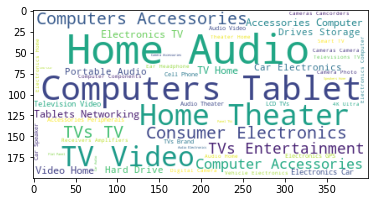

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='white',
                    stopwords =  set(STOPWORDS),
                    max_words = 50, 
                    random_state = 42,)
wc.generate(' '.join(df['categories']))
plt.imshow(wc)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
#df['punctuation_count'] = df['Product_Description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))
df['numerics'] = df['categories'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['upper'] = df['categories'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
cvec = TfidfVectorizer(max_features=1000, norm = 'l1', lowercase=True, smooth_idf=False, sublinear_tf=False, ngram_range=(1,6), tokenizer=TreebankWordTokenizer().tokenize)
df_info = pd.DataFrame(cvec.fit_transform(df['categories']).todense())
df_info.columns = ['categories_Top_' + str(c) for c in df_info.columns]
df = pd.concat([df, df_info], axis=1)

In [ ]:
df['cat_copy']=df['categories']

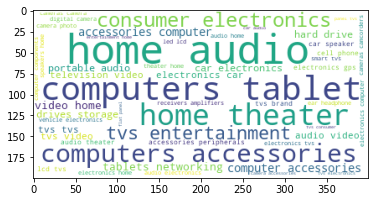

In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

df['categories'] = df['categories'].apply(clean_text)
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='white',
                    stopwords =  set(STOPWORDS),
                    max_words = 50, 
                    random_state = 42,)
wc.generate(' '.join(df['categories']))
plt.imshow(wc)

In [ ]:
import string
punctuation=string.punctuation
df['word_count']=df['categories'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['categories'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))

df['avg_word'] = df['categories'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['categories'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['word_density'] = df['char_count'] / (df['word_count']+1)


In [ ]:
j=[]
for i in df['categories']:
  j.append(len(i))
df['len']=j

In [ ]:
from textblob import TextBlob
df['polarity'] = df.apply(lambda x: TextBlob(x['categories']).sentiment.polarity, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['categories']).sentiment.subjectivity, axis=1)

In [ ]:
df['categories']=df['cat_copy']
del df['cat_copy']

In [ ]:
m=[]
for i in df['categories']:
  k=list(map(str, i.strip().split(',')))
  k.sort()
  k=str(k)
  m.append(k)
df['categories']=m

In [ ]:
i=list(range(0, 7102))
df['title']=i

In [ ]:
import re
go_tags=df.copy()
def clean_tag(tag):
    tag = re.sub(r"[\'\[\]]","",tag)
    tag = re.sub(r'\s','',tag)
    tag = re.sub(r'\"','',tag)
    return tag
go_tags['categories']=go_tags['categories'].apply(lambda x: clean_tag(x))

temp=go_tags['categories'].str.split(',')

go_tags=go_tags.reindex(go_tags.index.repeat(temp.apply(len)))
go_tags['categories_new'] = np.hstack(temp)
go_tags=go_tags[['title','categories_new']]
go_tags=pd.crosstab(go_tags.title,go_tags.categories_new)
go_tags.head()

categories_new  #13540in  #14498in  ...  portableaudio&accessories  sports
title                               ...                                   
0                      0         0  ...                          0       0
1                      0         0  ...                          0       0
2                      0         0  ...                          0       0
3                      0         0  ...                          0       0
4                      0         0  ...                          0       0

[5 rows x 2008 columns]

In [ ]:
df=df.merge(go_tags, on='title', how='left')

In [ ]:
del df['categories']
del df['title']

In [ ]:
df = pd.get_dummies(df, columns=['brand'#,'Grade'#,'charges_2 (%)'
                                 ])

In [ ]:
train = df[df['price'].isnull()==False]
test = df[df['price'].isnull()==True]
del test['price']

In [ ]:
#Statical Features Extracting from train and test rows after droping Inovicedate or Exctracting features
#Train
train['Std'] = train.std(axis=1).round(2)
train['quantile1'] = train.quantile(q=0.01,axis=1).round(2)
train['quantile3'] = train.quantile(q=0.25,axis=1).round(2)
train['quantile5'] = train.quantile(q=0.50,axis=1).round(2)                                              
train['Mean'] = train.mean(axis=1).round(2)
#Test
test['Std'] = test.std(axis=1).round(2)
test['quantile1'] = test.quantile(q=0.01,axis=1).round(2)
test['quantile3'] = test.quantile(q=0.25,axis=1).round(2)
test['quantile5'] = test.quantile(q=0.50,axis=1).round(2)                                              
test['Mean'] = test.mean(axis=1).round(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
train_df=train.copy()
test_df=test.copy()

In [ ]:
train_df['price'] = np.log1p(train_df['price'])

In [ ]:
X = train_df.drop(labels=['price'], axis=1)
y = train_df['price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=101)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4892, 3323), (4892,), (544, 3323), (544,))

In [ ]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 1500,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 500
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 0.26156
[200]	valid_0's rmse: 0.259693
[300]	valid_0's rmse: 0.260561
Early stopping, best iteration is:
[156]	valid_0's rmse: 0.257445
RMSLE: 0.2574447027057759


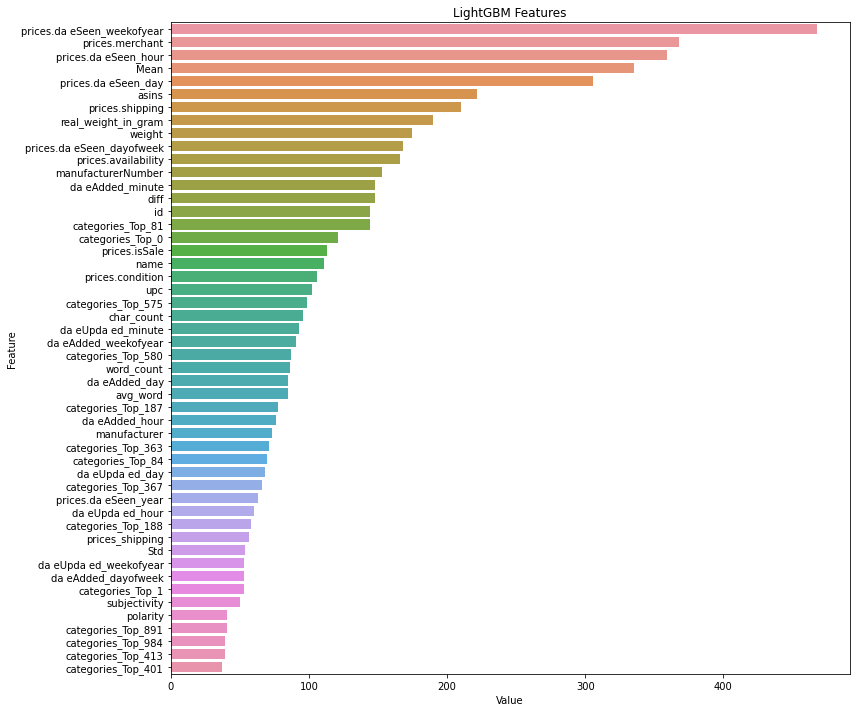

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.27644987442364116


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.299700428094651


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.3339255971474635


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.4168677067260316


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.3816194576764846


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.2659631635220397


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.2674707472089078


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.2700115015027646


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.2955957836855278


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.2809763044376614


In [ ]:
np.mean(errlgb,0)

0.3088580564425173

In [ ]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))
lgbm_final

array([495.65892431,  58.3929667 , 272.98662759, ..., 123.58443597,
        25.62665515,  60.57967649])

In [ ]:
submission = pd.DataFrame({
        "prediction": lgbm_final
    })
submission.to_csv('./rank3.csv', index=False)
print(submission)

      prediction
0     495.658924
1      58.392967
2     272.986628
3     473.850594
4     476.338137
...          ...
1661   64.671872
1662  170.929527
1663  123.584436
1664   25.626655
1665   60.579676

[1666 rows x 1 columns]
